In [407]:
import pandas as pd

- Notas Varias:
- Mes del Reporte es mes de matricula

### Concatenación de todos os archivos en un dataframe

In [408]:
meses = ['ABRIL','AGOSTO','JULIO','JUNIO','MARZO','MAYO','SEPTIEMBRE']

dfcompleto = ''

for mes in meses:
    dftemporal = pd.read_excel(f'./Datos_EducacionContinua_EAFIT/{mes}.xlsx',skiprows=[0])
    dftemporal['MesAsistencia'] = mes
    if mes == 'ABRIL':
        dfcompleto = dftemporal
    else:
        dfcompleto = pd.concat([dfcompleto,dftemporal])

dfcompleto = dfcompleto.astype(str)

c:\ProgramData\Anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
c:\ProgramData\Anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
c:\ProgramData\Anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
c:\ProgramData\Anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
c:\ProgramData\Anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
c:\ProgramData\Anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
c:\P

#### Se convierten los meses a numeros para facilidad de trabajo

In [409]:
def convertoNum(item):
    if item == 'MARZO':
        return 3
    if item == 'ABRIL':
        return 4
    if item == 'MAYO':
        return 5
    if item == 'JUNIO':
        return 6
    if item == 'JULIO':
        return 7
    if item == 'AGOSTO':
        return 8
    if item == 'SEPTIEMBRE':
        return 9

dfcompleto.columns = dfcompleto.columns.str.replace(' ', '')

dfcompleto['Mesdelreporte'] = dfcompleto['Mesdelreporte'].apply(lambda x: convertoNum(x))

dfcompleto['MesAsistencia'] = dfcompleto['MesAsistencia'].apply(lambda x: convertoNum(x))

dfcompleto = dfcompleto.sort_values(by=['MesAsistencia'],ascending=True)

dfcompleto = dfcompleto.reset_index(drop=True)

### Se eliminan los espacios en blanco

In [410]:

dfcompleto['N°deDocumento'] = dfcompleto['N°deDocumento'].apply(lambda str: str.replace(' ',''))

### Actualizacion del documento en todos los estudiantes por el ultimo registrado

- Se asigna un estado de los siguientes:

Continuo: No ha faltado ningun mes desde su matricula y sigue estudiando hasta donde se tiene registro <br>
Desertó completamente: Es un estudiante que no ha vuelto desde un mes especifico <br>
Deserto y Volvió: Estudiante que deserto en un mes determinado y regreso posteriormente en otro <br>
Recién Matriculado: Estudiante que ingreso al sistema en el ultimo mes del que se tiene registro (SEPTIEMBRE) <br>

In [411]:
dfnombres = dfcompleto.drop_duplicates(subset=['Primernombredelestudiante', 'SegundoNombredelestudiante','Primerapellidodelestudiante','Segundoapellidodelestudiante'],keep='last')

for index, row in dfnombres.iterrows():
    dfcompleto['N°deDocumento'][((dfcompleto['Primernombredelestudiante'] == row['Primernombredelestudiante']) 
    & (dfcompleto['SegundoNombredelestudiante'] == row['SegundoNombredelestudiante']) 
    & (dfcompleto['Primerapellidodelestudiante'] == row['Primerapellidodelestudiante']) 
    & (dfcompleto['Segundoapellidodelestudiante'] == row['Segundoapellidodelestudiante']))] = row['N°deDocumento']


C:\Users\mcifuenteg\AppData\Local\Temp\ipykernel_12236\3374463115.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcompleto['N°deDocumento'][((dfcompleto['Primernombredelestudiante'] == row['Primernombredelestudiante'])


## Analisis de Deserción General

##### Ciclo que recorre los datos para determinar el estado del Estudiante

In [412]:
documentos = dfcompleto['N°deDocumento'].value_counts().index


### Documentos de identidad del dataframe

dfcompleto['Estado'] = ''

count = 0
for doc in documentos:
    count += 1
    resultado = 'Continuo'
    lista = dfcompleto[dfcompleto['N°deDocumento'] == doc]['MesAsistencia'].values
    for i in range(len(lista)):
        if lista[i] != lista[-1]:
            if (lista[i]+1) != lista[i+1]:
                resultado = "Deserto y Volvió"
        else:
            if lista[i] != 9:
                resultado = "Desertó completamente"
            elif (lista[i] == lista[0]) and (lista[i] == 9):
                resultado = "Recién Matriculado"
    dfcompleto['Estado'][dfcompleto['N°deDocumento'] == doc]= resultado

C:\Users\mcifuenteg\AppData\Local\Temp\ipykernel_12236\4070303459.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcompleto['Estado'][dfcompleto['N°deDocumento'] == doc]= resultado


## Creacion de Excel por Institución

In [413]:
listainst = dfcompleto['InstituciónEducativa'].value_counts().index
for institucion in listainst:
    dfexcel = dfcompleto[dfcompleto['InstituciónEducativa'] == f'{institucion}'].drop_duplicates(['N°deDocumento'],keep='last')[['N°deDocumento',
    'Primernombredelestudiante','SegundoNombredelestudiante','Primerapellidodelestudiante','Segundoapellidodelestudiante','InstituciónEducativa','Mundo','Estado']]

    writer = pd.ExcelWriter(f"Resultados/{institucion}.xlsx",engine="openpyxl")
    dfexcel.to_excel(writer, index=False)
    writer.close()

## Resultado Final

- Es el dataframe con la columna de estado anexada al final

In [414]:
dfcompleto

,Mesdelreporte,N°deDocumento,TipoDoc,Primernombredelestudiante,SegundoNombredelestudiante,Primerapellidodelestudiante,Segundoapellidodelestudiante,Genero,FechadeNacimiento,EstadoCivil,...,InstituciónEducativa,CódigoDANE,Grado,Atención,Proveedor,LugardePrestacion,GRUPOEAFIT,MesAsistencia,GRUPO,Estado
0,3,1036258173,T.I.,ANA,SOFÍA,CORTES,PEREZ,F,2010-01-01 00:00:00,SOLTERO,...,ANA GOMEZ DE SIERRA,205615000508,5,VIRTUAL Y TRABAJO EN CASA,UNIVERSIDAD EAFIT,Ana Gómez de Sierra,nan,3,6.0,Continuo
1,3,1026144778,T.I.,EVELYN,FAILEDY,RUIZ,DUQUE,F,2009-12-08 00:00:00,SOLTERO,...,ANA GOMEZ DE SIERRA,205615000508,5,VIRTUAL Y TRABAJO EN CASA,UNIVERSIDAD EAFIT,Ana Gómez de Sierra,nan,3,6.0,Continuo
2,3,1035643861,T.I.,SAYURIS,nan,VILLALBA,GIL,F,2008-10-30 00:00:00,SOLTERO,...,ENRIQUE VELEZ ESCOBAR,105360000288,8,VIRTUAL Y TRABAJO EN CASA,UNIVERSIDAD EAFIT,Enrique Vélez Escobar,nan,3,3.0,Continuo
3,3,1026136550,T.I.,SAMUEL,nan,GARCÉS,BERMÚDEZ,M,2007-01-22 00:00:00,SOLTERO,...,JOSE MARIA BERNAL,105129000216,9,VIRTUAL Y TRABAJO EN CASA,UNIVERSIDAD EAFIT,José María Bernal,nan,3,1.0,Continuo
4,3,1040879054,T.I.,JUAN,FERNANDO,CARDONA,MUÑOZ,M,2011-02-19 00:00:00,SOLTERO,...,ANA GOMEZ DE SIERRA,205615000508,5,VIRTUAL Y TRABAJO EN CASA,UNIVERSIDAD EAFIT,Ana Gómez de Sierra,nan,3,6.0,Continuo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5271,4,N62204290757,NIES,YENNYBER,MICHELL,ALVAREZ,RAMOS,F,2009-01-26 00:00:00,SOLTERO,...,ENRIQUE VELEZ ESCOBAR,105360000288,6,VIRTUAL Y TRABAJO EN CASA,UNIVERSIDAD EAFIT,ENRIQUE VELEZ ESCOBAR,9.0,9,nan,Continuo
5272,4,1192463874,T.I.,JUAN,FELIPE,HERNANDEZ,MONTOYA,M,2009-05-13 00:00:00,SOLTERO,...,ENRIQUE VELEZ ESCOBAR,105360000288,6,VIRTUAL Y TRABAJO EN CASA,UNIVERSIDAD EAFIT,ENRIQUE VELEZ ESCOBAR,9.0,9,nan,Continuo
5273,4,1023528133,T.I.,JUAN,CARLOS,GIL,VALENCIA,M,2009-03-13 00:00:00,SOLTERO,...,ENRIQUE VELEZ ESCOBAR,105360000288,7,VIRTUAL Y TRABAJO EN CASA,UNIVERSIDAD EAFIT,ENRIQUE VELEZ ESCOBAR,9.0,9,nan,Continuo
5274,4,1192463042,T.I.,LUCIANA,nan,NARVÁEZ,MELÉNDEZ,F,2008-04-21 00:00:00,SOLTERO,...,ENRIQUE VELEZ ESCOBAR,105360000288,7,VIRTUAL Y TRABAJO EN CASA,UNIVERSIDAD EAFIT,ENRIQUE VELEZ ESCOBAR,9.0,9,nan,Continuo


# Resultados por institución

## Gráficos y cálculos por cada institución

## Institución Educativa Ana Gomez de Sierra

In [415]:
df_ana =pd.read_excel("Resultados/ANA GOMEZ DE SIERRA.xlsx")
df_ana.head()

,N°deDocumento,Primernombredelestudiante,SegundoNombredelestudiante,Primerapellidodelestudiante,Segundoapellidodelestudiante,InstituciónEducativa,Mundo,Estado
0,N76094645322,SHARISCARLY,HADASSA,MUSTIOLA,BIERD,ANA GOMEZ DE SIERRA,VIDA EN SOCIEDAD,Continuo
1,1036254299,SARA,NaN,OSORIO,HIDALGO,ANA GOMEZ DE SIERRA,CIENCIAS,Continuo
2,1041324525,JUAN,MANUEL,MUÑOZ,JIMÉNEZ,ANA GOMEZ DE SIERRA,CIENCIAS,Continuo
3,1036252239,YOSELIN,XIOMARA,RENDÓN,GALVIS,ANA GOMEZ DE SIERRA,CIENCIAS,Continuo
4,1040872247,ANDRÉS,LEANDRO,CARDONA,OSPINA,ANA GOMEZ DE SIERRA,CIENCIAS,Continuo


Matplotlib is building the font cache; this may take a moment.


<AxesSubplot:ylabel='Estado'>

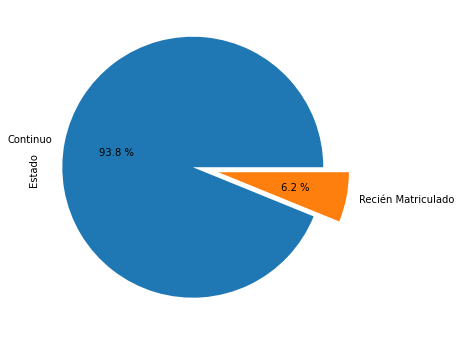

In [416]:
df_ana["Estado"].value_counts().plot(kind="pie", figsize=(6,6),autopct="%0.1f %%", explode=(0.1,0.1))

Text(0, 0.5, 'Estado')

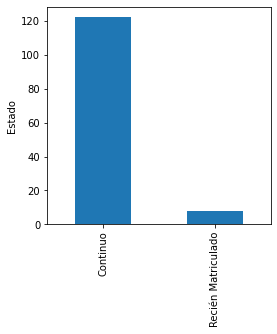

In [417]:
ax = df_ana["Estado"].value_counts().plot(kind="bar", figsize=(4,4))
ax.set_ylabel("Estado")

In [418]:
pd.DataFrame(df_ana["Estado"].value_counts())

,Estado
Continuo,122
Recién Matriculado,8


In [419]:
estado_total = df_ana["Estado"].value_counts()[0]+df_ana["Estado"].value_counts()[1]
estado_total

130

In [420]:
# Porcentaje de estudiantes que continuaron los cursos
continuo=(df_ana["Estado"].value_counts()[0]/estado_total)*100
continuo

93.84615384615384

In [421]:
# Porcentaje de estudiantes que desertaron
deser=(df_ana["Estado"].value_counts()[1]/estado_total)*100
deser

6.153846153846154

## Institución Educativa Barro Blanco

In [422]:
df_barro =pd.read_excel("Resultados/BARRO BLANCO.xlsx")
df_barro.head()

,N°deDocumento,Primernombredelestudiante,SegundoNombredelestudiante,Primerapellidodelestudiante,Segundoapellidodelestudiante,InstituciónEducativa,Mundo,Estado
0,1036252251,MARIA,ANDREA,CASTAÑO,ESCOBAR,BARRO BLANCO,VIDA EN SOCIEDAD,Desertó completamente
1,1111541667,NATALIA,NaN,MARLES,QUIRAMA,BARRO BLANCO,VIDA EN SOCIEDAD,Desertó completamente
2,1039224400,JHONATAN,NaN,CASTAÑO,CUADROS,BARRO BLANCO,VIDA EN SOCIEDAD,Desertó completamente
3,1036929533,ANA,SOFIA,HENAO,SUAREZ,BARRO BLANCO,VIDA EN SOCIEDAD,Desertó completamente
4,1036257160,JUAN,EDUARDO,RUIZ,SILVA,BARRO BLANCO,VIDA EN SOCIEDAD,Desertó completamente


<AxesSubplot:ylabel='Estado'>

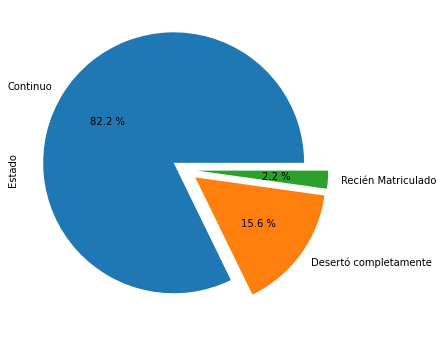

In [423]:
df_barro["Estado"].value_counts().plot(kind="pie", figsize=(6,6), autopct="%0.1f %%", explode=(0.1,0.1,0.1))

Text(0, 0.5, 'Estado')

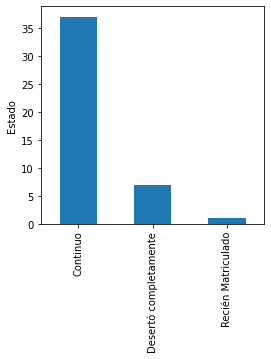

In [424]:
ax = df_barro["Estado"].value_counts().plot(kind="bar", figsize=(4,4))
ax.set_ylabel("Estado")

In [425]:
# Visualización de total estudiantes por estado
pd.DataFrame(df_barro["Estado"].value_counts())

,Estado
Continuo,37
Desertó completamente,7
Recién Matriculado,1


In [426]:
# Número Total de estudiantes pertenecientes al colegio
estado_total = df_barro["Estado"].value_counts()[0]+df_barro["Estado"].value_counts()[1]
estado_total

44

In [427]:
# Porcentaje de estudiantes que continuaron los cursos
continuo=(df_barro["Estado"].value_counts()[0]/estado_total)*100
continuo

84.0909090909091

In [428]:
# Porcentaje de estudiantes que desertaron
deser=(df_barro["Estado"].value_counts()[1]/estado_total)*100
deser

15.909090909090908

In [429]:
## Porcentaje de estudiantes recién matriculados
recien=(df_barro["Estado"].value_counts()[2]/estado_total)*100
recien

2.272727272727273

## Intitución Educativa consejo municipal El Porvenir

In [430]:
df_porv =pd.read_excel("Resultados/CONCEJO MUNICIPAL EL PORVENIR.xlsx")
df_porv.head()

,N°deDocumento,Primernombredelestudiante,SegundoNombredelestudiante,Primerapellidodelestudiante,Segundoapellidodelestudiante,InstituciónEducativa,Mundo,Estado
0,1036925010,MANUEL,JULIÁN,OROZCO,ALZATE,CONCEJO MUNICIPAL EL PORVENIR,VIDA EN SOCIEDAD,Desertó completamente
1,1036257939,MARIA,FERNANDA,CASTAÑO,OSPINA,CONCEJO MUNICIPAL EL PORVENIR,VIDA EN SOCIEDAD,Desertó completamente
2,1011510565,JUAN,EDUARDO,OCHOA,SÁNCHEZ,CONCEJO MUNICIPAL EL PORVENIR,VIDA EN SOCIEDAD,Desertó completamente
3,1034916812,KAREN,NaN,QUEJADA,LONDOÑO,CONCEJO MUNICIPAL EL PORVENIR,VIDA EN SOCIEDAD,Desertó completamente
4,1040871336,MARÍA,LORENA,RIVERA,CARDONA,CONCEJO MUNICIPAL EL PORVENIR,VIDA EN SOCIEDAD,Desertó completamente


<AxesSubplot:ylabel='Estado'>

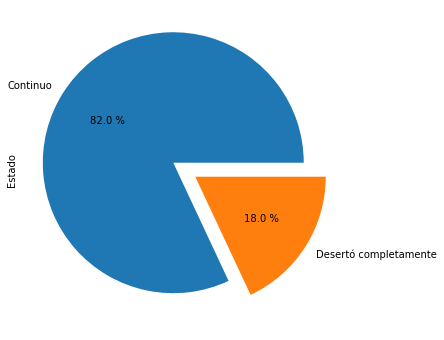

In [431]:
df_porv["Estado"].value_counts().plot(kind="pie", figsize=(6,6), autopct="%0.1f %%", explode=(0.1,0.1))

Text(0, 0.5, 'Estado')

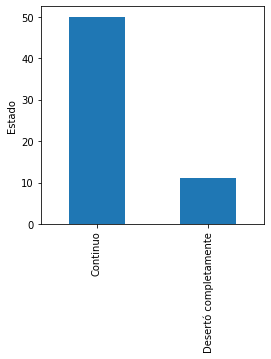

In [432]:
ax = df_porv["Estado"].value_counts().plot(kind="bar", figsize=(4,4))
ax.set_ylabel("Estado")

In [433]:
# Visualización de total estudiantes por estado
pd.DataFrame(df_porv["Estado"].value_counts())

,Estado
Continuo,50
Desertó completamente,11


In [434]:
# Número Total de estudiantes pertenecientes al colegio
estado_total = df_porv["Estado"].value_counts()[0]+df_porv["Estado"].value_counts()[1]
estado_total

61

In [435]:
# Porcentaje de estudiantes que continuaron los cursos
continuo=(df_porv["Estado"].value_counts()[0]/estado_total)*100
continuo

81.9672131147541

In [436]:
# Porcentaje de estudiantes que desertaron
deser=(df_porv["Estado"].value_counts()[1]/estado_total)*100
deser

18.0327868852459

## Institución Educativa Enrique Vélez Escobar

In [437]:
df_enrique =pd.read_excel("Resultados/ENRIQUE VELEZ ESCOBAR.xlsx")
df_enrique.head()

,N°deDocumento,Primernombredelestudiante,SegundoNombredelestudiante,Primerapellidodelestudiante,Segundoapellidodelestudiante,InstituciónEducativa,Mundo,Estado
0,1037591026,LUISA,MARIA,BARRENECHE,GUTIERREZ,ENRIQUE VELEZ ESCOBAR,VIDA EN SOCIEDAD,Desertó completamente
1,31188386,CARLOS,ANTONIO,GARCIA,VALERA,ENRIQUE VELEZ ESCOBAR,VIDA EN SOCIEDAD,Desertó completamente
2,1035972273,LEIDY,MARIANA,ARBOLEDA,CHICA,ENRIQUE VELEZ ESCOBAR,VIDA EN SOCIEDAD,Desertó completamente
3,1035973692,JUAN,DAVID,MEJIA,RICO,ENRIQUE VELEZ ESCOBAR,VIDA EN SOCIEDAD,Desertó completamente
4,1033179812,ANA,MARÍA,ALVAREZ,GAVIRIA,ENRIQUE VELEZ ESCOBAR,VIDA EN SOCIEDAD,Desertó completamente


<AxesSubplot:ylabel='Estado'>

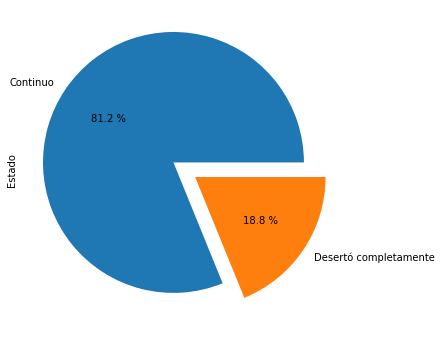

In [438]:
df_enrique["Estado"].value_counts().plot(kind="pie", figsize=(6,6), autopct="%0.1f %%", explode=(0.1,0.1))

Text(0, 0.5, 'Estado')

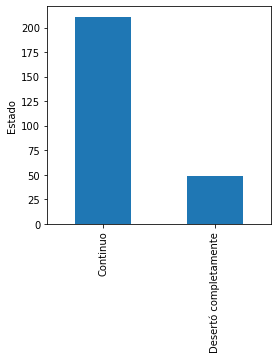

In [439]:
ax = df_enrique["Estado"].value_counts().plot(kind="bar", figsize=(4,4))
ax.set_ylabel("Estado")

In [440]:
# Visualización de total estudiantes por estado
pd.DataFrame(df_enrique["Estado"].value_counts())

,Estado
Continuo,211
Desertó completamente,49


In [441]:
# Número Total de estudiantes pertenecientes al colegio
estado_total = df_enrique["Estado"].value_counts()[0]+df_enrique["Estado"].value_counts()[1]
estado_total

260

In [442]:
# Porcentaje de estudiantes que continuaron los cursos
continuo=(df_enrique["Estado"].value_counts()[0]/estado_total)*100
continuo

81.15384615384616

In [443]:
# Porcentaje de estudiantes que desertaron
deser=(df_enrique["Estado"].value_counts()[1]/estado_total)*100
deser

18.846153846153847

## Institución Educativa Guillermo Gaviria

In [444]:
df_guillermo =pd.read_excel("Resultados/GUILLERMO GAVIRIA.xlsx")
df_guillermo.head()

,N°deDocumento,Primernombredelestudiante,SegundoNombredelestudiante,Primerapellidodelestudiante,Segundoapellidodelestudiante,InstituciónEducativa,Mundo,Estado
0,1017156099,MARÍA,CAMILA,RICO,MONTOYA,GUILLERMO GAVIRIA,VIDA EN SOCIEDAD,Desertó completamente
1,1022002235,EMMANUEL,NaN,HERRERA,GONZÁLEZ,GUILLERMO GAVIRIA,VIDA EN SOCIEDAD,Desertó completamente
2,1036926878,MARIA,CAMILA,SANCHEZ,OCHOA,GUILLERMO GAVIRIA,VIDA EN SOCIEDAD,Desertó completamente
3,1022033466,CAMILA,NaN,CASTAÑO,HURTADO,GUILLERMO GAVIRIA,VIDA EN SOCIEDAD,Desertó completamente
4,1036252765,ZHARINK,CAMILA,GRAJALES,MUÑOZ,GUILLERMO GAVIRIA,VIDA EN SOCIEDAD,Desertó completamente


<AxesSubplot:ylabel='Estado'>

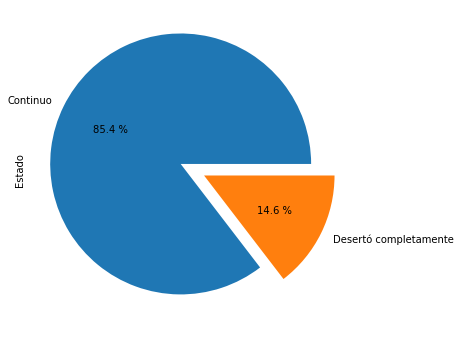

In [445]:
df_guillermo["Estado"].value_counts().plot(kind="pie", figsize=(6,6), autopct="%0.1f %%", explode=(0.1,0.1))

Text(0, 0.5, 'Estado')

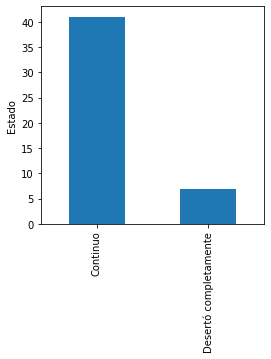

In [446]:
ax = df_guillermo["Estado"].value_counts().plot(kind="bar", figsize=(4,4))
ax.set_ylabel("Estado")

In [447]:
# Visualización de total estudiantes por estado
pd.DataFrame(df_guillermo["Estado"].value_counts())

,Estado
Continuo,41
Desertó completamente,7


In [448]:
# Número Total de estudiantes pertenecientes al colegio
estado_total = df_guillermo["Estado"].value_counts()[0]+df_guillermo["Estado"].value_counts()[1]
estado_total

48

In [449]:
# Porcentaje de estudiantes que continuaron los cursos
continuo=(df_guillermo["Estado"].value_counts()[0]/estado_total)*100
continuo

85.41666666666666

In [450]:
# Porcentaje de estudiantes que desertaron
deser=(df_guillermo["Estado"].value_counts()[1]/estado_total)*100
deser

14.583333333333334

## Lectura de los resultados

In [451]:
#Lectura de dataframe resultados
#JOSE ANTONIO GALAN
dfJOSE_ANTONIO_GALAN = pd.read_excel(f'./Resultados/JOSE ANTONIO GALAN.xlsx')
#JOSE MARIA BERNAL
dfJOSE_MARIA_BERNAL = pd.read_excel(f'./Resultados/JOSE MARIA BERNAL.xlsx')
#SAN JOSE DE LAS CUCHILLAS
dfSAN_JOSE_DE_LAS_CUCHILLAS = pd.read_excel(f'./Resultados/SAN JOSE DE LAS CUCHILLAS.xlsx')
#SANTO ÁNGEL
dfSANTO_ÁNGEL = pd.read_excel(f'./Resultados/SANTO ÁNGEL.xlsx')
#SANTO TOMAS DE AQUINO
dfSANTO_TOMAS_DE_AQUINO = pd.read_excel(f'./Resultados/SANTO TOMAS DE AQUINO.xlsx')

### Calculos JOSE ANTONIO GALAN

In [452]:
pd.DataFrame(dfJOSE_ANTONIO_GALAN["Estado"].value_counts())

,Estado
Continuo,40
Desertó completamente,25


In [453]:
#Cantidad de personas que se registraron en uno de los dos cursos
print("Cantidad de personas que se registraron en uno de los dos cursos: ",
      (dfJOSE_ANTONIO_GALAN["Estado"].value_counts()[0])+(dfJOSE_ANTONIO_GALAN["Estado"].value_counts()[1]))
#Cantidad de personas que continuaron uno de los dos cursos
print("Cantidad de personas que continuaron uno de los dos cursos: ",(dfJOSE_ANTONIO_GALAN["Estado"].value_counts()[0]))
#Cantidad de personas que desertaron en uno de los dos cursos
print("Cantidad de personas que desertaron en uno de los dos cursos: ",(dfJOSE_ANTONIO_GALAN["Estado"].value_counts()[1]))
#Porcentaje de deserción
print("Porcentaje de deserción: ",(dfJOSE_ANTONIO_GALAN["Estado"].value_counts()[1])/
      ((dfJOSE_ANTONIO_GALAN["Estado"].value_counts()[0])+(dfJOSE_ANTONIO_GALAN["Estado"].value_counts()[1]))*100)
#Porcentaje de aprobación (continuo)
print("Porcentaje de continuación: ",(dfJOSE_ANTONIO_GALAN["Estado"].value_counts()[0])/
      ((dfJOSE_ANTONIO_GALAN["Estado"].value_counts()[0])+(dfJOSE_ANTONIO_GALAN["Estado"].value_counts()[1]))*100)

Cantidad de personas que se registraron en uno de los dos cursos:  65
Cantidad de personas que continuaron uno de los dos cursos:  40
Cantidad de personas que desertaron en uno de los dos cursos:  25
Porcentaje de deserción:  38.46153846153847
Porcentaje de continuación:  61.53846153846154


In [454]:
dfJOSE_ANTONIO_GALAN["Mundo"].value_counts()

VIDA EN SOCIEDAD    65
Name: Mundo, dtype: int64

### Graficas JOSE ANTONIO GALAN

<AxesSubplot:ylabel='Estado'>

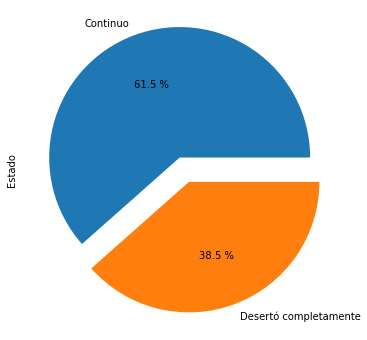

In [455]:
dfJOSE_ANTONIO_GALAN["Estado"].value_counts().plot(kind="pie", figsize=(6,6), autopct="%0.1f %%", explode=(0.1,0.1))

<AxesSubplot:>

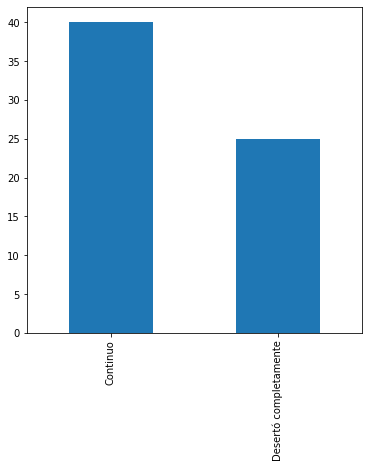

In [456]:
dfJOSE_ANTONIO_GALAN["Estado"].value_counts().plot(kind="bar", figsize=(6,6))

### Cálculos Jose Maria Bernal

In [457]:
pd.DataFrame(dfJOSE_MARIA_BERNAL["Estado"].value_counts())

,Estado
Continuo,99
Desertó completamente,50
Recién Matriculado,35


In [458]:
#Cantidad de personas que se registraron en uno de los dos cursos
print("Cantidad de personas que se registraron en uno de los dos cursos: ",
      (dfJOSE_MARIA_BERNAL["Estado"].value_counts()[0])+
      (dfJOSE_MARIA_BERNAL["Estado"].value_counts()[1])+
     (dfJOSE_MARIA_BERNAL["Estado"].value_counts()[2]))
#Cantidad de personas que continuaron uno de los dos cursos
print("Cantidad de personas que continuaron uno de los dos cursos: ",(dfJOSE_MARIA_BERNAL["Estado"].value_counts()[0]))
#Cantidad de personas que desertaron en uno de los dos cursos
print("Cantidad de personas que desertaron en uno de los dos cursos: ",(dfJOSE_MARIA_BERNAL["Estado"].value_counts()[1]))
#Cantidad de personas que desertaron en uno de los dos cursos
print("Cantidad de personas que recién se matricularon en uno de los dos cursos: ",(dfJOSE_MARIA_BERNAL["Estado"].value_counts()[2]))
#Porcentaje de deserción
print("Porcentaje de deserción: ",(dfJOSE_MARIA_BERNAL["Estado"].value_counts()[1])/
      ((dfJOSE_MARIA_BERNAL["Estado"].value_counts()[0])+
       (dfJOSE_MARIA_BERNAL["Estado"].value_counts()[1])+
      (dfJOSE_MARIA_BERNAL["Estado"].value_counts()[2]))*100)
#Porcentaje de aprobación (continuo)
print("Porcentaje de continuación: ",(dfJOSE_MARIA_BERNAL["Estado"].value_counts()[0])/
      ((dfJOSE_MARIA_BERNAL["Estado"].value_counts()[0])+
       (dfJOSE_MARIA_BERNAL["Estado"].value_counts()[1])+
      (dfJOSE_MARIA_BERNAL["Estado"].value_counts()[2]))*100)
#Porcentaje de recién matriculadis
print("Porcentaje de recién matriculados: ",(dfJOSE_MARIA_BERNAL["Estado"].value_counts()[2])/
      ((dfJOSE_MARIA_BERNAL["Estado"].value_counts()[0])+
       (dfJOSE_MARIA_BERNAL["Estado"].value_counts()[1])+
      (dfJOSE_MARIA_BERNAL["Estado"].value_counts()[2]))*100)

Cantidad de personas que se registraron en uno de los dos cursos:  184
Cantidad de personas que continuaron uno de los dos cursos:  99
Cantidad de personas que desertaron en uno de los dos cursos:  50
Cantidad de personas que recién se matricularon en uno de los dos cursos:  35
Porcentaje de deserción:  27.173913043478258
Porcentaje de continuación:  53.80434782608695
Porcentaje de recién matriculados:  19.021739130434785


### Graficas Jose Maria Bernal

<AxesSubplot:ylabel='Estado'>

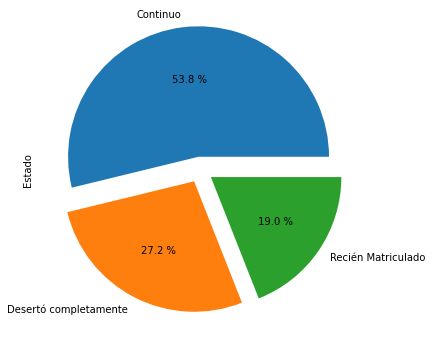

In [459]:
dfJOSE_MARIA_BERNAL["Estado"].value_counts().plot(kind="pie", figsize=(6,6), autopct="%0.1f %%", explode=(0.1,0.1,0.1))

<AxesSubplot:>

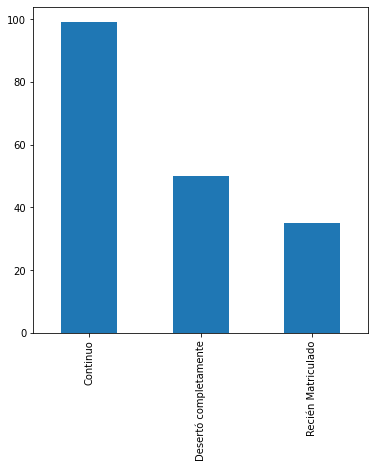

In [460]:
dfJOSE_MARIA_BERNAL["Estado"].value_counts().plot(kind="bar", figsize=(6,6))

### Cálculos San Jose De Las Cuchillas

In [461]:
#Cantidad de personas que se registraron en uno de los dos cursos
print("Cantidad de personas que se registraron en uno de los dos cursos: ",
      (dfSAN_JOSE_DE_LAS_CUCHILLAS["Estado"].value_counts()[0])+(dfSAN_JOSE_DE_LAS_CUCHILLAS["Estado"].value_counts()[1]))
#Cantidad de personas que continuaron uno de los dos cursos
print("Cantidad de personas que continuaron uno de los dos cursos: ",(dfSAN_JOSE_DE_LAS_CUCHILLAS["Estado"].value_counts()[0]))
#Cantidad de personas que desertaron en uno de los dos cursos
print("Cantidad de personas que desertaron en uno de los dos cursos: ",(dfSAN_JOSE_DE_LAS_CUCHILLAS["Estado"].value_counts()[1]))
#Porcentaje de deserción
print("Porcentaje de deserción: ",(dfSAN_JOSE_DE_LAS_CUCHILLAS["Estado"].value_counts()[1])/
      ((dfSAN_JOSE_DE_LAS_CUCHILLAS["Estado"].value_counts()[0])+(dfSAN_JOSE_DE_LAS_CUCHILLAS["Estado"].value_counts()[1]))*100)
#Porcentaje de aprobación (continuo)
print("Porcentaje de continuación: ",(dfSAN_JOSE_DE_LAS_CUCHILLAS["Estado"].value_counts()[0])/
      ((dfSAN_JOSE_DE_LAS_CUCHILLAS["Estado"].value_counts()[0])+(dfSAN_JOSE_DE_LAS_CUCHILLAS["Estado"].value_counts()[1]))*100)

Cantidad de personas que se registraron en uno de los dos cursos:  52
Cantidad de personas que continuaron uno de los dos cursos:  38
Cantidad de personas que desertaron en uno de los dos cursos:  14
Porcentaje de deserción:  26.923076923076923
Porcentaje de continuación:  73.07692307692307


### Gráficos San Jose De Las Cuchillas

<AxesSubplot:ylabel='Estado'>

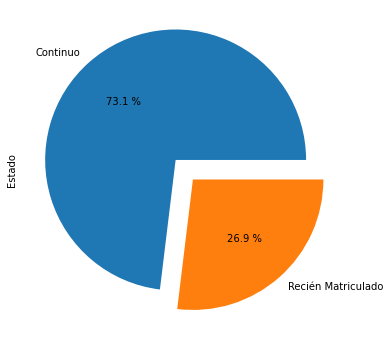

In [462]:
dfSAN_JOSE_DE_LAS_CUCHILLAS["Estado"].value_counts().plot(kind="pie", figsize=(6,6), autopct="%0.1f %%", explode=(0.1,0.1))

<AxesSubplot:>

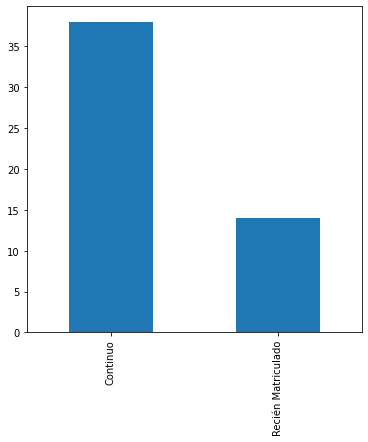

In [463]:
dfSAN_JOSE_DE_LAS_CUCHILLAS["Estado"].value_counts().plot(kind="bar", figsize=(6,6))

### Cálculos Santo Ángel

In [464]:
pd.DataFrame(dfSANTO_ÁNGEL["Estado"].value_counts())

,Estado
Continuo,95
Recién Matriculado,12
Desertó completamente,3


In [465]:
#Cantidad de personas que se registraron en uno de los dos cursos
print("Cantidad de personas que se registraron en uno de los dos cursos: ",
      (dfSANTO_ÁNGEL["Estado"].value_counts()[0])+
      (dfSANTO_ÁNGEL["Estado"].value_counts()[1])+
     (dfSANTO_ÁNGEL["Estado"].value_counts()[2]))
#Cantidad de personas que continuaron uno de los dos cursos
print("Cantidad de personas que continuaron uno de los dos cursos: ",(dfSANTO_ÁNGEL["Estado"].value_counts()[0]))
#Cantidad de personas que desertaron en uno de los dos cursos
print("Cantidad de personas que desertaron en uno de los dos cursos: ",(dfSANTO_ÁNGEL["Estado"].value_counts()[2]))
#Cantidad de personas que desertaron en uno de los dos cursos
print("Cantidad de personas que recién se matricularon en uno de los dos cursos: ",(dfSANTO_ÁNGEL["Estado"].value_counts()[1]))
#Porcentaje de deserción
print("Porcentaje de deserción: ",(dfSANTO_ÁNGEL["Estado"].value_counts()[2])/
      ((dfSANTO_ÁNGEL["Estado"].value_counts()[0])+
       (dfSANTO_ÁNGEL["Estado"].value_counts()[1])+
      (dfSANTO_ÁNGEL["Estado"].value_counts()[2]))*100)
#Porcentaje de aprobación (continuo)
print("Porcentaje de continuación: ",(dfSANTO_ÁNGEL["Estado"].value_counts()[0])/
      ((dfSANTO_ÁNGEL["Estado"].value_counts()[0])+
       (dfSANTO_ÁNGEL["Estado"].value_counts()[1])+
      (dfSANTO_ÁNGEL["Estado"].value_counts()[2]))*100)
#Porcentaje de recién matriculadis
print("Porcentaje de recién matriculados: ",(dfSANTO_ÁNGEL["Estado"].value_counts()[1])/
      ((dfSANTO_ÁNGEL["Estado"].value_counts()[0])+
       (dfSANTO_ÁNGEL["Estado"].value_counts()[1])+
      (dfSANTO_ÁNGEL["Estado"].value_counts()[2]))*100)

Cantidad de personas que se registraron en uno de los dos cursos:  110
Cantidad de personas que continuaron uno de los dos cursos:  95
Cantidad de personas que desertaron en uno de los dos cursos:  3
Cantidad de personas que recién se matricularon en uno de los dos cursos:  12
Porcentaje de deserción:  2.727272727272727
Porcentaje de continuación:  86.36363636363636
Porcentaje de recién matriculados:  10.909090909090908


### Gráficos Cálculos Santo Ángel

<AxesSubplot:ylabel='Estado'>

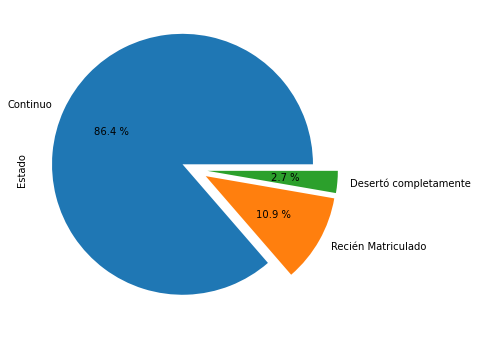

In [466]:
dfSANTO_ÁNGEL["Estado"].value_counts().plot(kind="pie", figsize=(6,6), autopct="%0.1f %%", explode=(0.1,0.1,0.1))

<AxesSubplot:>

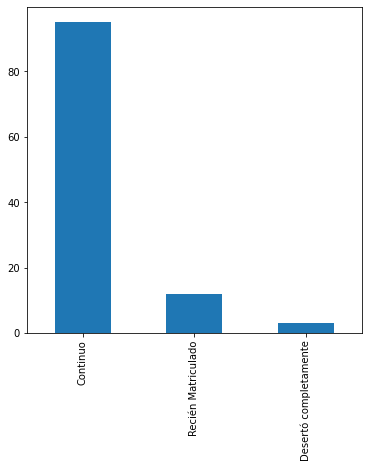

In [467]:
dfSANTO_ÁNGEL["Estado"].value_counts().plot(kind="bar", figsize=(6,6))

### Cálculos Santo Tomas De Aquino

In [468]:
pd.DataFrame(dfSANTO_TOMAS_DE_AQUINO["Estado"].value_counts())

,Estado
Continuo,48
Desertó completamente,3


In [469]:
#Cantidad de personas que se registraron en uno de los dos cursos
print("Cantidad de personas que se registraron en uno de los dos cursos: ",
      (dfSANTO_TOMAS_DE_AQUINO["Estado"].value_counts()[0])+(dfSANTO_TOMAS_DE_AQUINO["Estado"].value_counts()[1]))
#Cantidad de personas que continuaron uno de los dos cursos
print("Cantidad de personas que continuaron uno de los dos cursos: ",(dfSANTO_TOMAS_DE_AQUINO["Estado"].value_counts()[0]))
#Cantidad de personas que desertaron en uno de los dos cursos
print("Cantidad de personas que desertaron en uno de los dos cursos: ",(dfSANTO_TOMAS_DE_AQUINO["Estado"].value_counts()[1]))
#Porcentaje de deserción
print("Porcentaje de deserción: ",(dfSANTO_TOMAS_DE_AQUINO["Estado"].value_counts()[1])/
      ((dfSANTO_TOMAS_DE_AQUINO["Estado"].value_counts()[0])+(dfSANTO_TOMAS_DE_AQUINO["Estado"].value_counts()[1]))*100)
#Porcentaje de aprobación (continuo)
print("Porcentaje de continuación: ",(dfSANTO_TOMAS_DE_AQUINO["Estado"].value_counts()[0])/
      ((dfSANTO_TOMAS_DE_AQUINO["Estado"].value_counts()[0])+(dfSANTO_TOMAS_DE_AQUINO["Estado"].value_counts()[1]))*100)

Cantidad de personas que se registraron en uno de los dos cursos:  51
Cantidad de personas que continuaron uno de los dos cursos:  48
Cantidad de personas que desertaron en uno de los dos cursos:  3
Porcentaje de deserción:  5.88235294117647
Porcentaje de continuación:  94.11764705882352


### Gráficos Santo Tomas De Aquino

<AxesSubplot:ylabel='Estado'>

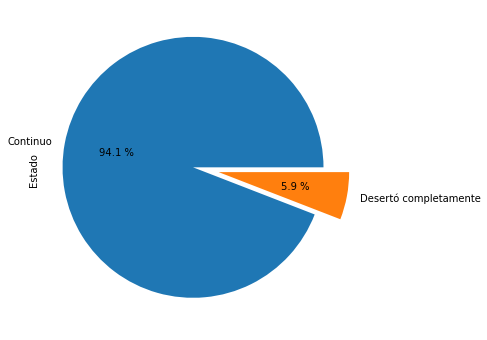

In [470]:
dfSANTO_TOMAS_DE_AQUINO["Estado"].value_counts().plot(kind="pie", figsize=(6,6), autopct="%0.1f %%", explode=(0.1,0.1))

<AxesSubplot:>

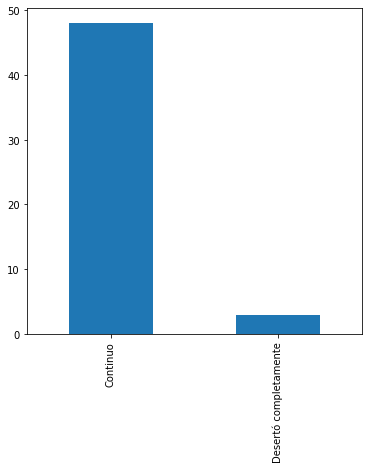

In [471]:
dfSANTO_TOMAS_DE_AQUINO["Estado"].value_counts().plot(kind="bar", figsize=(6,6))